### Load the data ###

In [42]:
import pandas as pd
import random
import numpy as np

# Read data
data = pd.read_csv('HR_data.csv')
random.seed(42)  # For reproducibility
np.random.seed(42)

### Train the models and get accuracy and contingency table ###

In [43]:
import sklearn.linear_model as lm
from sklearn import tree

# Fit regression tree classifier, Gini split criterion, no pruning
criterion = "gini"
dtc = tree.DecisionTreeClassifier(criterion=criterion, min_samples_split=2)

# Threshold for target variable
threshold = 3
y = data['Frustrated'] > threshold

# Input features
num_cols = ['HR_Mean', 'HR_Median', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC']
X = data[num_cols]

# Variables for statistic calculations
scores_log = []
scores_tree = []
contengency_table = [[0, 0], [0, 0]]
confusion_matrix_log = [[0, 0], [0, 0]]
confusion_matrix_tree = [[0, 0], [0, 0]]

# Labels for above and below threshold
pos = 1
neg = 0

for k in range(0, len(X), 12):
    X_test = X.iloc[k:k+12]
    X_train = pd.concat([X.iloc[:k], X.iloc[k+12:]])
    y_test = y.iloc[k:k+12]
    y_train = pd.concat([y.iloc[:k], y.iloc[k+12:]])

    # logistic regression
    model = lm.LogisticRegression(max_iter=5000)
    model.fit(X_train, y_train)

    # decision tree
    dtc.fit(X_train, y_train)

    # evaluate the models accuracies
    score = model.score(X_test, y_test)
    print(f'Accuracy of logistic regression: {score:.2f}')
    scores_log.append(score)
    score = dtc.score(X_test, y_test)
    print(f'Accuracy of decision tree: {score:.2f}')
    scores_tree.append(score)

    # make contingency table
    y_pred_log = model.predict(X_test)
    y_pred_tree = dtc.predict(X_test)
    for i in range(len(y_test)):
        if y_test.iloc[i] == 1:
            if y_pred_log[i] == 1:
                if y_pred_tree[i] == 1:
                    contengency_table[0][0] += 1
                else:
                    contengency_table[0][1] += 1
            else:
                if y_pred_tree[i] == 1:
                    contengency_table[1][0] += 1
                else:
                    contengency_table[1][1] += 1
        else:
            if y_pred_log[i] == 0:
                if y_pred_tree[i] == 0:
                    contengency_table[0][0] += 1
                else:
                    contengency_table[0][1] += 1
            else:
                if y_pred_tree[i] == 0:
                    contengency_table[1][0] += 1
                else:
                    contengency_table[1][1] += 1
    
    # Update confusion matrices
    for i in range(len(y_test)):
        if y_test.iloc[i] == pos:
            if y_pred_log[i] == pos:
                confusion_matrix_log[0][0] += 1
            else:
                confusion_matrix_log[0][1] += 1
        else:
            if y_pred_log[i] == neg:
                confusion_matrix_log[1][1] += 1
            else:
                confusion_matrix_log[1][0] += 1

        if y_test.iloc[i] == pos:
            if y_pred_tree[i] == pos:
                confusion_matrix_tree[0][0] += 1
            else:
                confusion_matrix_tree[0][1] += 1
        else:
            if y_pred_tree[i] == neg:
                confusion_matrix_tree[1][1] += 1
            else:
                confusion_matrix_tree[1][0] += 1

# Print the average accuracies
print(f'Average accuracy of logistic regression: {sum(scores_log) / len(scores_log):.2f}')
print(f'Average accuracy of decision tree: {sum(scores_tree) / len(scores_tree):.2f}')

# Print the contingency table
print(contengency_table)

# Print the confusion matrices
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix_log)
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix_tree)

Accuracy of logistic regression: 0.75
Accuracy of decision tree: 0.50
Accuracy of logistic regression: 0.67
Accuracy of decision tree: 0.50
Accuracy of logistic regression: 0.67
Accuracy of decision tree: 0.42
Accuracy of logistic regression: 0.58
Accuracy of decision tree: 0.67
Accuracy of logistic regression: 0.58
Accuracy of decision tree: 0.42
Accuracy of logistic regression: 0.50
Accuracy of decision tree: 0.42
Accuracy of logistic regression: 0.58
Accuracy of decision tree: 0.50
Accuracy of logistic regression: 0.83
Accuracy of decision tree: 0.33
Accuracy of logistic regression: 0.58
Accuracy of decision tree: 0.58
Accuracy of logistic regression: 0.92
Accuracy of decision tree: 0.75
Accuracy of logistic regression: 0.83
Accuracy of decision tree: 0.83
Accuracy of logistic regression: 0.75
Accuracy of decision tree: 0.42
Accuracy of logistic regression: 1.00
Accuracy of decision tree: 0.67
Accuracy of logistic regression: 0.58
Accuracy of decision tree: 0.42
Average accuracy of 

### McNemar test for full dataset ###

In [44]:
import statsmodels.stats.contingency_tables as ctt

# Perform the McNemar's test
result = ctt.mcnemar(contengency_table, exact=True)

# Print the result of McNemar's test
print(f"McNemar's test statistic: {result.statistic}, p-value: {result.pvalue:.10f}")

McNemar's test statistic: 9.0, p-value: 0.0000249040


### Check for normal distribution ###

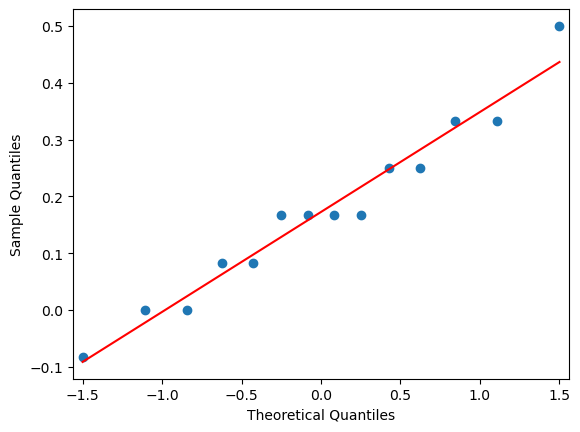

In [ ]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Calculate differences in accuracy
diff = np.array(scores_log) - np.array(scores_tree)

# Make QQ-plot
sm.qqplot(diff, line='r')
plt.show()

### Train models for cohort 1 ###

In [ ]:
# Fit regression tree classifier, Gini split criterion, no pruning
criterion = "gini"
dtc = tree.DecisionTreeClassifier(criterion=criterion, min_samples_split=2)

# Same threshold
threshold = 3
y = data['Frustrated'] > threshold

# Same input features
num_cols = ['HR_Mean', 'HR_Median', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC']
X = data[num_cols]

# Same variables for statistics
scores_log = []
scores_tree = []
contengency_table_1 = [[0, 0], [0, 0]]
confusion_matrix_log_1 = [[0, 0], [0, 0]]
confusion_matrix_tree_1 = [[0, 0], [0, 0]]

# Same labels
pos = 1
neg = 0

# Counter for amount of data points
count = 0

for k in range(0, 12*8, 12):
    X_test = X.iloc[k:k+12]
    X_train = pd.concat([X.iloc[:k], X.iloc[k+12:12*8]])
    y_test = y.iloc[k:k+12]
    y_train = pd.concat([y.iloc[:k], y.iloc[k+12:12*8]])

    # logistic regression
    model = lm.LogisticRegression(max_iter=5000)
    model.fit(X_train, y_train)

    # decision tree
    dtc.fit(X_train, y_train)

    # Evaluate the models accuracies
    score = model.score(X_test, y_test)
    print(f'Accuracy of logistic regression: {score:.2f}')
    scores_log.append(score)
    score = dtc.score(X_test, y_test)
    print(f'Accuracy of decision tree: {score:.2f}')
    scores_tree.append(score)

    # Update the contingency table
    y_pred_log = model.predict(X_test)
    y_pred_tree = dtc.predict(X_test)
    for i in range(len(y_test)):
        if y_test.iloc[i] == 1:
            if y_pred_log[i] == 1:
                if y_pred_tree[i] == 1:
                    contengency_table_1[0][0] += 1
                else:
                    contengency_table_1[0][1] += 1
            else:
                if y_pred_tree[i] == 1:
                    contengency_table_1[1][0] += 1
                else:
                    contengency_table_1[1][1] += 1
        else:
            if y_pred_log[i] == 0:
                if y_pred_tree[i] == 0:
                    contengency_table_1[0][0] += 1
                else:
                    contengency_table_1[0][1] += 1
            else:
                if y_pred_tree[i] == 0:
                    contengency_table_1[1][0] += 1
                else:
                    contengency_table_1[1][1] += 1
    
    # Update confusion matrices
    for i in range(len(y_test)):
        if y_test.iloc[i] == pos:
            if y_pred_log[i] == pos:
                confusion_matrix_log_1[0][0] += 1
            else:
                confusion_matrix_log_1[0][1] += 1
        else:
            if y_pred_log[i] == neg:
                confusion_matrix_log_1[1][1] += 1
            else:
                confusion_matrix_log_1[1][0] += 1

        if y_test.iloc[i] == pos:
            if y_pred_tree[i] == pos:
                confusion_matrix_tree_1[0][0] += 1
            else:
                confusion_matrix_tree_1[0][1] += 1
        else:
            if y_pred_tree[i] == neg:
                confusion_matrix_tree_1[1][1] += 1
            else:
                confusion_matrix_tree_1[1][0] += 1
        count += 1

# Print the average accuracies
print(f'Average accuracy of logistic regression: {sum(scores_log) / len(scores_log):.2f}')
print(f'Average accuracy of decision tree: {sum(scores_tree) / len(scores_tree):.2f}')

# Print the contingency table
print(contengency_table_1)

# Print the confusion matrices
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix_log_1)
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix_tree_1)

# Print the amount of data points
print(count)

Accuracy of logistic regression: 0.75
Accuracy of decision tree: 0.58
Accuracy of logistic regression: 0.58
Accuracy of decision tree: 0.42
Accuracy of logistic regression: 0.67
Accuracy of decision tree: 0.50
Accuracy of logistic regression: 0.67
Accuracy of decision tree: 0.42
Accuracy of logistic regression: 0.58
Accuracy of decision tree: 0.50
Accuracy of logistic regression: 0.58
Accuracy of decision tree: 0.58
Accuracy of logistic regression: 0.58
Accuracy of decision tree: 0.67
Accuracy of logistic regression: 0.83
Accuracy of decision tree: 0.50
Average accuracy of logistic regression: 0.66
Average accuracy of decision tree: 0.52
[[36, 27], [14, 19]]
Confusion Matrix for Logistic Regression:
[[3, 30], [3, 60]]
Confusion Matrix for Decision Tree:
[[14, 19], [27, 36]]
96


### McNemar test for cohort 1 ###

In [ ]:
import statsmodels.stats.contingency_tables as ctt

# Perform the McNemar's test for cohort 1
result = ctt.mcnemar(contengency_table_1, exact=True)

# Print the result of McNemar's test for cohort 1
print(f"McNemar's test statistic: {result.statistic}, p-value: {result.pvalue:.10f}")

McNemar's test statistic: 14.0, p-value: 0.0595838880


### Train the models for cohort 2 ###

In [ ]:
# Fit regression tree classifier, Gini split criterion, no pruning
criterion = "gini"
dtc = tree.DecisionTreeClassifier(criterion=criterion, min_samples_split=2)

# Same threshold
threshold = 3
y = data['Frustrated'] > threshold

# Same input features
num_cols = ['HR_Mean', 'HR_Median', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC']
X = data[num_cols]

# Same variables for statistics
scores_log = []
scores_tree = []
contengency_table_2 = [[0, 0], [0, 0]]
confusion_matrix_log_2 = [[0, 0], [0, 0]]
confusion_matrix_tree_2 = [[0, 0], [0, 0]]

# Same labels
pos = 1
neg = 0

# Same counter for data points
count = 0

for k in range(12*8, len(X), 12):
    X_test = X.iloc[k:k+12]
    X_train = pd.concat([X.iloc[12*8:k], X.iloc[k+12:]])
    y_test = y.iloc[k:k+12]
    y_train = pd.concat([y.iloc[12*8:k], y.iloc[k+12:]])

    # logistic regression
    model = lm.LogisticRegression(max_iter=5000)
    model.fit(X_train, y_train)

    # decision tree
    dtc.fit(X_train, y_train)

    # Evaluate the models accuracies
    score = model.score(X_test, y_test)
    print(f'Accuracy of logistic regression: {score:.2f}')
    scores_log.append(score)
    score = dtc.score(X_test, y_test)
    print(f'Accuracy of decision tree: {score:.2f}')
    scores_tree.append(score)

    # Update the contingency table
    y_pred_log = model.predict(X_test)
    y_pred_tree = dtc.predict(X_test)
    for i in range(len(y_test)):
        if y_test.iloc[i] == 1:
            if y_pred_log[i] == 1:
                if y_pred_tree[i] == 1:
                    contengency_table_2[0][0] += 1
                else:
                    contengency_table_2[0][1] += 1
            else:
                if y_pred_tree[i] == 1:
                    contengency_table_2[1][0] += 1
                else:
                    contengency_table_2[1][1] += 1
        else:
            if y_pred_log[i] == 0:
                if y_pred_tree[i] == 0:
                    contengency_table_2[0][0] += 1
                else:
                    contengency_table_2[0][1] += 1
            else:
                if y_pred_tree[i] == 0:
                    contengency_table_2[1][0] += 1
                else:
                    contengency_table_2[1][1] += 1
    
    # Update confusion matrices
    for i in range(len(y_test)):
        if y_test.iloc[i] == pos:
            if y_pred_log[i] == pos:
                confusion_matrix_log_2[0][0] += 1
            else:
                confusion_matrix_log_2[0][1] += 1
        else:
            if y_pred_log[i] == neg:
                confusion_matrix_log_2[1][1] += 1
            else:
                confusion_matrix_log_2[1][0] += 1

        if y_test.iloc[i] == pos:
            if y_pred_tree[i] == pos:
                confusion_matrix_tree_2[0][0] += 1
            else:
                confusion_matrix_tree_2[0][1] += 1
        else:
            if y_pred_tree[i] == neg:
                confusion_matrix_tree_2[1][1] += 1
            else:
                confusion_matrix_tree_2[1][0] += 1
        count += 1

# Print the average scores
print(f'Average accuracy of logistic regression: {sum(scores_log) / len(scores_log):.2f}')
print(f'Average accuracy of decision tree: {sum(scores_tree) / len(scores_tree):.2f}')

# Print the contingency table
print(contengency_table_2)

# Print the confusion matrices
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix_log_2)
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix_tree_2)

# Print the amount of data points
print(count)

Accuracy of logistic regression: 0.58
Accuracy of decision tree: 0.67
Accuracy of logistic regression: 0.92
Accuracy of decision tree: 0.75
Accuracy of logistic regression: 0.92
Accuracy of decision tree: 0.67
Accuracy of logistic regression: 0.75
Accuracy of decision tree: 0.67
Accuracy of logistic regression: 0.58
Accuracy of decision tree: 0.50
Accuracy of logistic regression: 0.67
Accuracy of decision tree: 0.58
Average accuracy of logistic regression: 0.74
Average accuracy of decision tree: 0.64
[[41, 12], [5, 14]]
Confusion Matrix for Logistic Regression:
[[2, 12], [7, 51]]
Confusion Matrix for Decision Tree:
[[3, 11], [15, 43]]
72


### McNemar test for cohort 2 ###

In [ ]:
import statsmodels.stats.contingency_tables as ctt

# Perform the McNemar's test for cohort 2
result = ctt.mcnemar(contengency_table_2, exact=True)

# Print the result of McNemar's test for cohort 2
print(f"McNemar's test statistic: {result.statistic}, p-value: {result.pvalue:.10f}")

McNemar's test statistic: 5.0, p-value: 0.1434631348
